STUDENT PERFORMANCE INDICATOR

Problem Statement:
This project understands how the student's performance(test scores) is affected by other variables like Gender, Ethnicity, Parental level of Education, Lunch and Test prepertion course

Regression Problem

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("stud.csv")

In [6]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Data Cleaning

In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No missing values

In [16]:
df.duplicated().sum()

0

No duplicates in the dataset

In [15]:
print(df['gender'].value_counts())
print(df['lunch'].value_counts())
print(df['test_preparation_course'].value_counts())
print(df['parental_level_of_education'].value_counts())
print(df['race_ethnicity'].value_counts())

gender
female    518
male      482
Name: count, dtype: int64
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test_preparation_course
none         642
completed    358
Name: count, dtype: int64
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


In [17]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights from the cleaned data:
* All means are close to each other between 66 and 69.16
* Standard Deviation also lies between 14.6 to 15.19
* Min for maths is 0 while for reading is 17 and 10 for writing

In [18]:
#Seperating the numerical and categorical columns
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Numerical Features:", num_features)
print("Categorical Features:", cat_features)

Numerical Features: ['math_score', 'reading_score', 'writing_score']
Categorical Features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [19]:
#Combining three scores  into one total score column and another average score col

df['Total_Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average_score'] = df['Total_Score'] / 3

In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [23]:
#Calculating more insights frm the scores

math_toppers = [val for val in df['math_score'] if val == 100]
reading_toppers = [val for val in df['reading_score'] if val == 100]
writing_toppers = [val for val in df['writing_score'] if val == 100]

print("Math Toppers:", len(math_toppers))
print("Reading Toppers:", len(reading_toppers))
print("Writing Toppers:", len(writing_toppers))


Math Toppers: 7
Reading Toppers: 17
Writing Toppers: 14


Visualization

<Axes: xlabel='Average_score', ylabel='Count'>

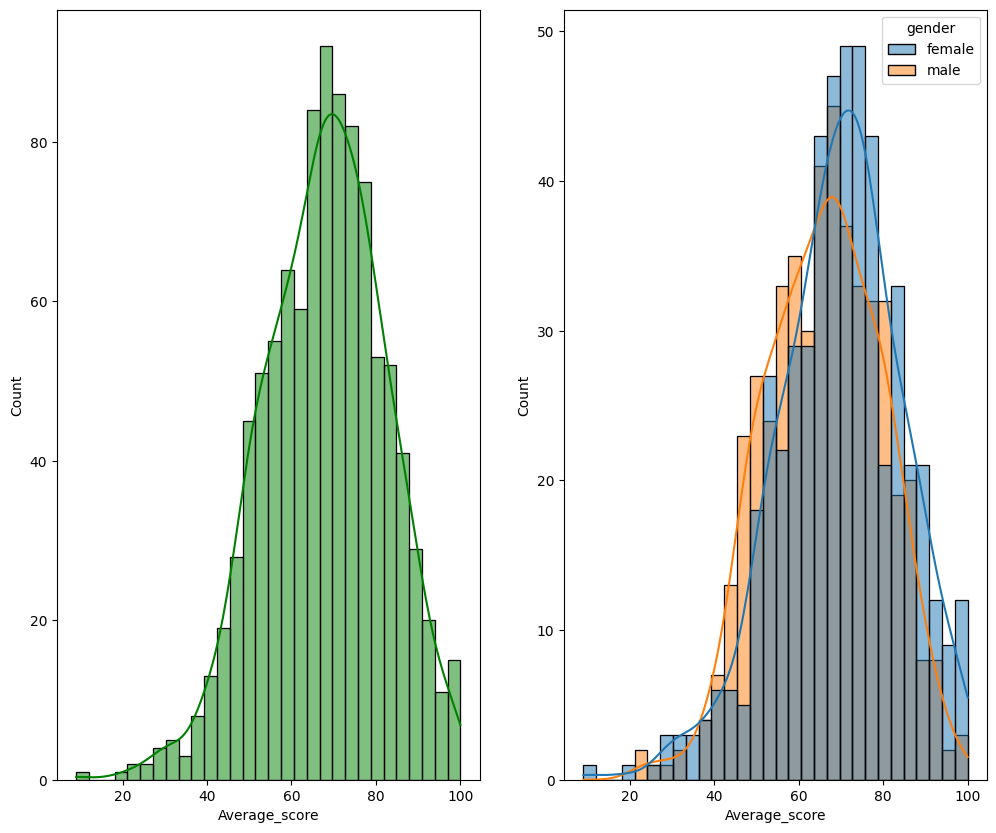

In [25]:
#Histogram and KDE

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplot(121)
sns.histplot(data = df, x = 'Average_score',kde = True, color = 'g',bins = 30)
plt.subplot(122)
sns.histplot(data = df, x = 'Average_score',kde = True, bins= 30,hue = 'gender')



<Axes: xlabel='Total_Score', ylabel='Count'>

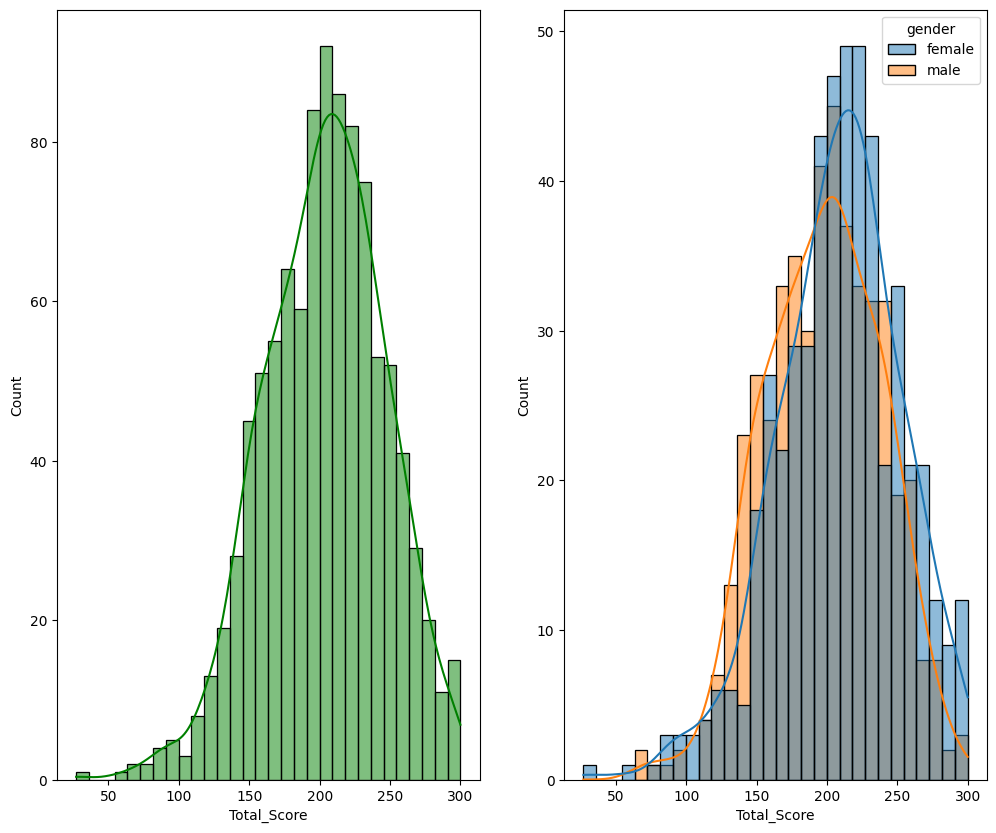

In [26]:
#Histogram and KDE

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplot(121)
sns.histplot(data = df, x = 'Total_Score',kde = True, color='g',bins=30)
plt.subplot(122)
sns.histplot(data = df, x = 'Total_Score',kde = True, bins= 30,hue = 'gender')



Therefore female students have performed better than male students

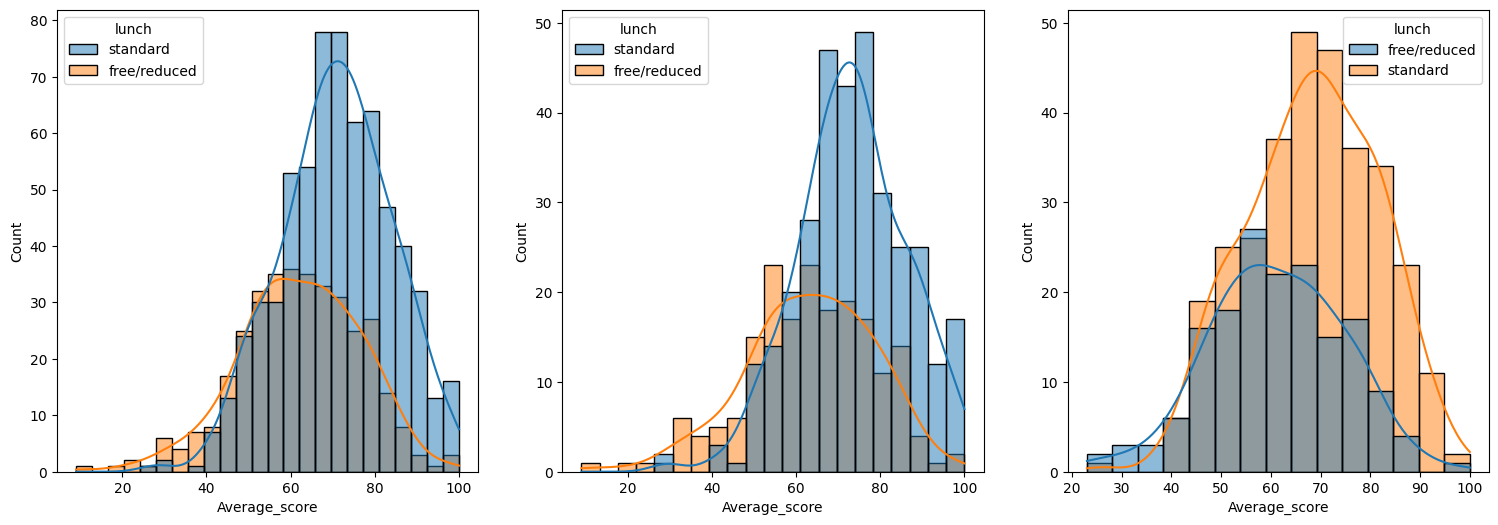

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average_score',hue = 'lunch',kde=True)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average_score',hue='lunch',kde=True)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average_score',hue='lunch',kde=True)
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

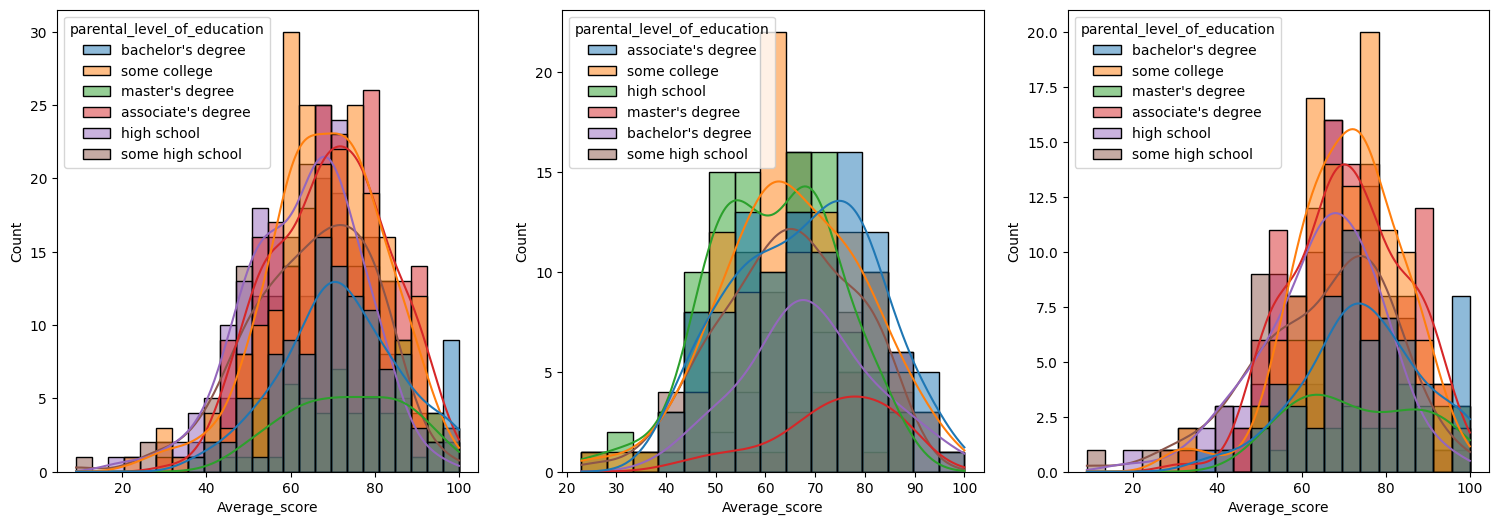

In [33]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average_score',hue = 'parental_level_of_education',kde=True)    
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average_score',hue = 'parental_level_of_education',kde=True)
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average_score',hue = 'parental_level_of_education',kde=True)
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

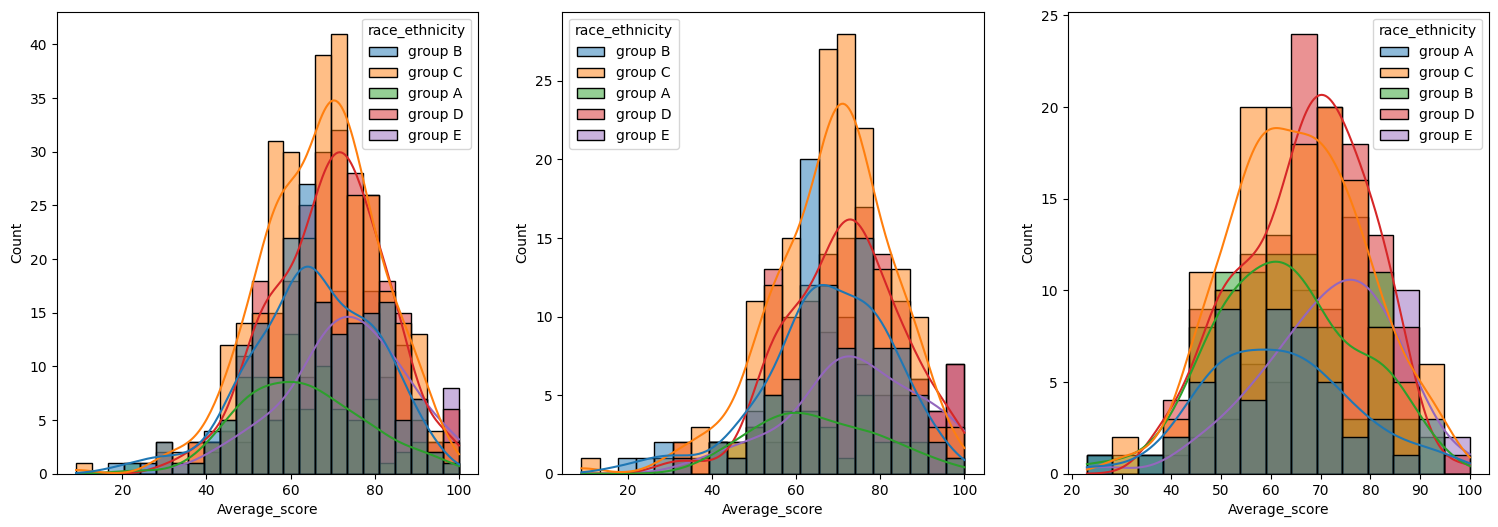

In [34]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

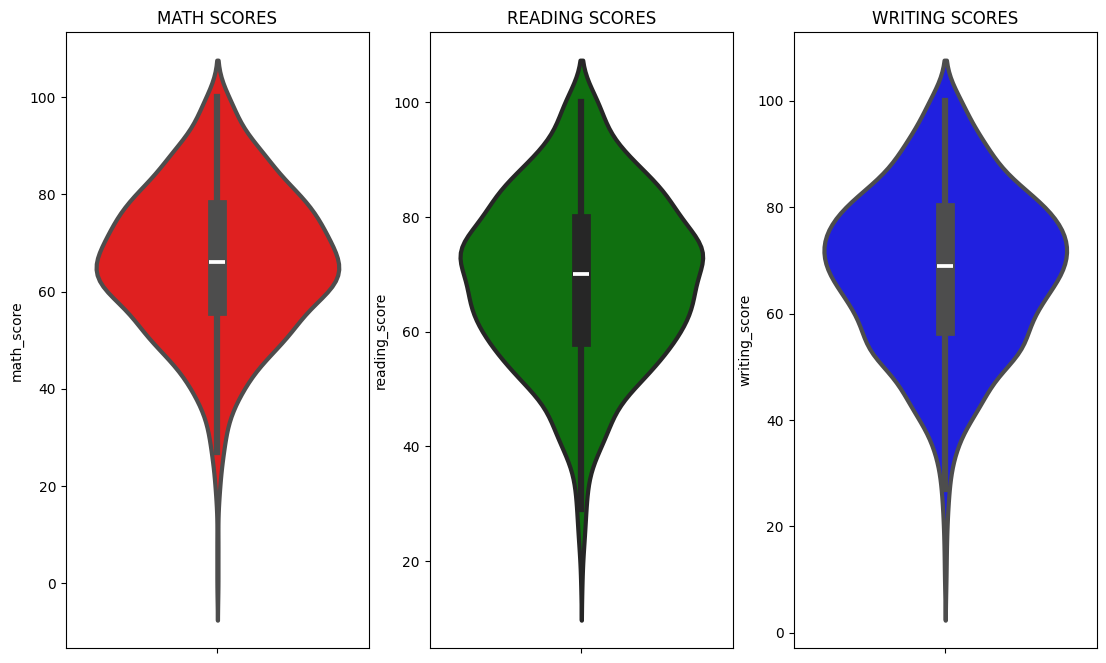

In [36]:
#Max score of students in all 3 domains
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80